In [84]:
time = pd.read_csv('../data/vets_SOF.csv', encoding = 'ISO-8859-1')

In [85]:
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_rows', 900)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib as mpl
from matplotlib import rcParams

In [86]:
#remove times from column and then create DateTime object
time['Created'] = time['CreatedDate'].str.split().apply(lambda x: x[0])
time['Created'] = pd.to_datetime(time['Created'])

In [87]:
#create officer category to approximate age
officers = time[(time['Tribe'] == 'Pilot')|(time['Tribe'] == 'Helo Pilot')|(time['Military_specialty_in_real_words'].str.contains('officer'))|(time['Military_specialty_in_real_words'].str.contains('Officer'))|(time['Undergrad_School'].str.contains('Academy'))]

In [88]:
#create new officer column
time.insert(15, 'Officer', time.index.isin(officers.index))

In [89]:
#create new Approximate Age column based on officer data
time['Approx_Age'] = np.where(time['Officer'] == True, time['Years_of_Service'] + 22, time['Years_of_Service'] + 19)

# Plot Age Distribution

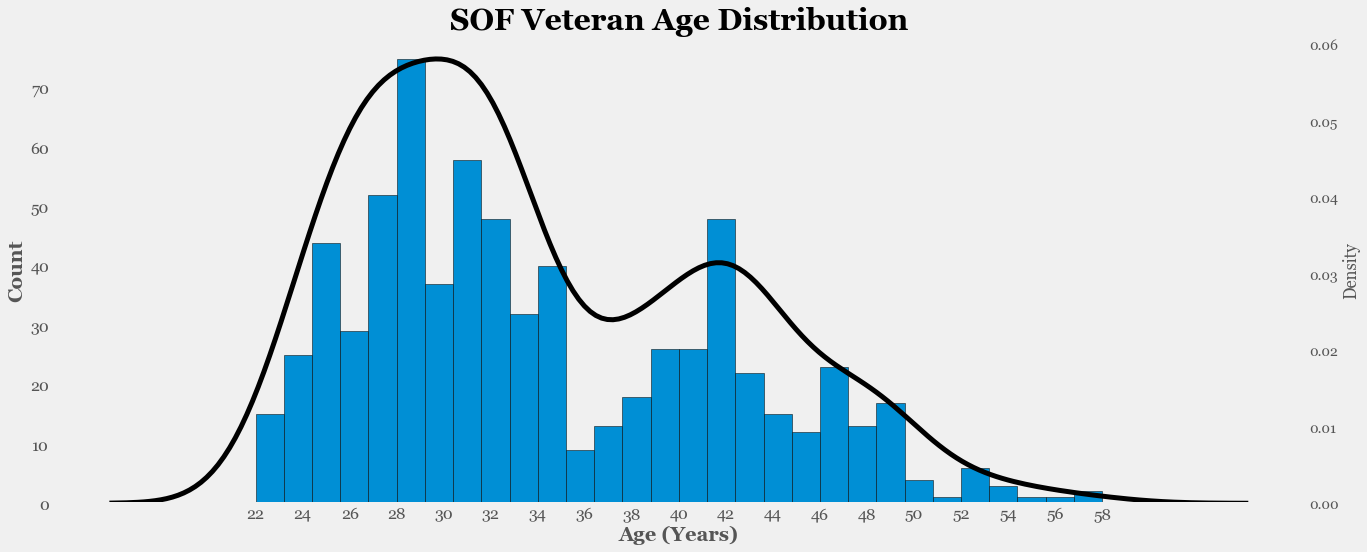

In [90]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
title = plt.title('SOF Veteran Age Distribution', fontweight='bold', fontsize=30)

data = time['Approx_Age'].dropna()
x = data.index
y = data.values

#plot 1 - Histogram
plot1 = ax1.hist(data, align='mid', edgecolor='black', bins=30)
ax1.grid(False)
ticks = ax1.set_xticks(range(22,60,2))
params = ax1.tick_params(axis='both', labelsize=16)

#plot 2 - KDE
plot2 = sns.kdeplot(time['Approx_Age'], ax=ax2, color='black', lw=5)
ax2.grid(False)
xlabel = ax1.set_xlabel('Age (Years)', fontweight='bold', fontsize=20)
ylabel = ax1.set_ylabel('Count', fontweight='bold', fontsize=20)
#lines=ax1.vlines([28.5, 42], ymin=[0,0], ymax=[74,41], lw=3, color='black')

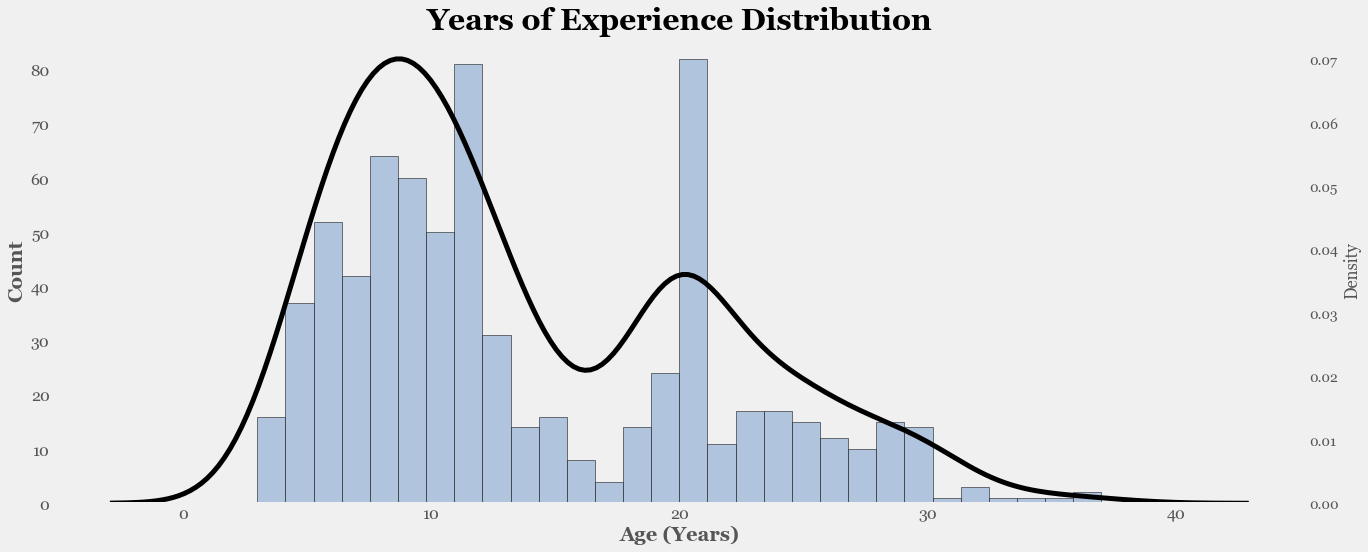

In [556]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
title = plt.title('Years of Experience Distribution', fontweight='bold', fontsize=30)

data = time['Years_of_Service'].dropna()

#plot 1 - Histogram
plot1 = ax1.hist(data, color='lightsteelblue', align='mid', edgecolor='black', bins=30)
ax1.grid(False)
#ticks = ax1.set_xticks(range(22,60,2))
params = ax1.tick_params(axis='both', labelsize=16)

#plot 2 - KDE
plot2 = sns.kdeplot(data, ax=ax2, color='black', lw=5)
ax2.grid(False)
xlabel = ax1.set_xlabel('Age (Years)', fontweight='bold', fontsize=20)
ylabel = ax1.set_ylabel('Count', fontweight='bold', fontsize=20)

In [92]:
pd.cut(data, bins=[0,12,16,40], labels=['Less than 12 years', '12 - 16 years', 'More than 17 years']).value_counts()/len(data)*100

Less than 12 years    56.223776
More than 17 years    34.125874
12 - 16 years          9.650350
Name: Years_of_Service, dtype: float64

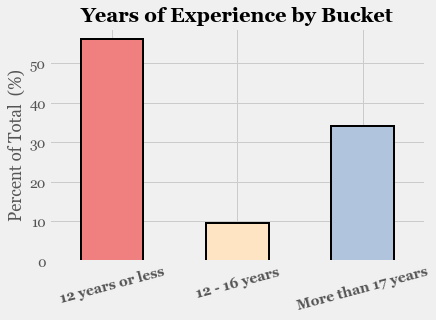

In [555]:
plt.style.use('fivethirtyeight')
categories = pd.cut(data, bins=[0,12,16,40], labels=['12 years or less', '12 - 16 years', 'More than 17 years'])\
            .value_counts().sort_index()/len(data) * 100
chart = categories.plot.bar(lw=2,edgecolor='black', color=['lightcoral', 'bisque', 'lightsteelblue'])
ticks = plt.xticks(rotation=15, fontweight='bold')
title = plt.title('Years of Experience by Bucket', fontweight='bold')
ylabel = plt.ylabel('Percent of Total  (%)')

# Target Industries

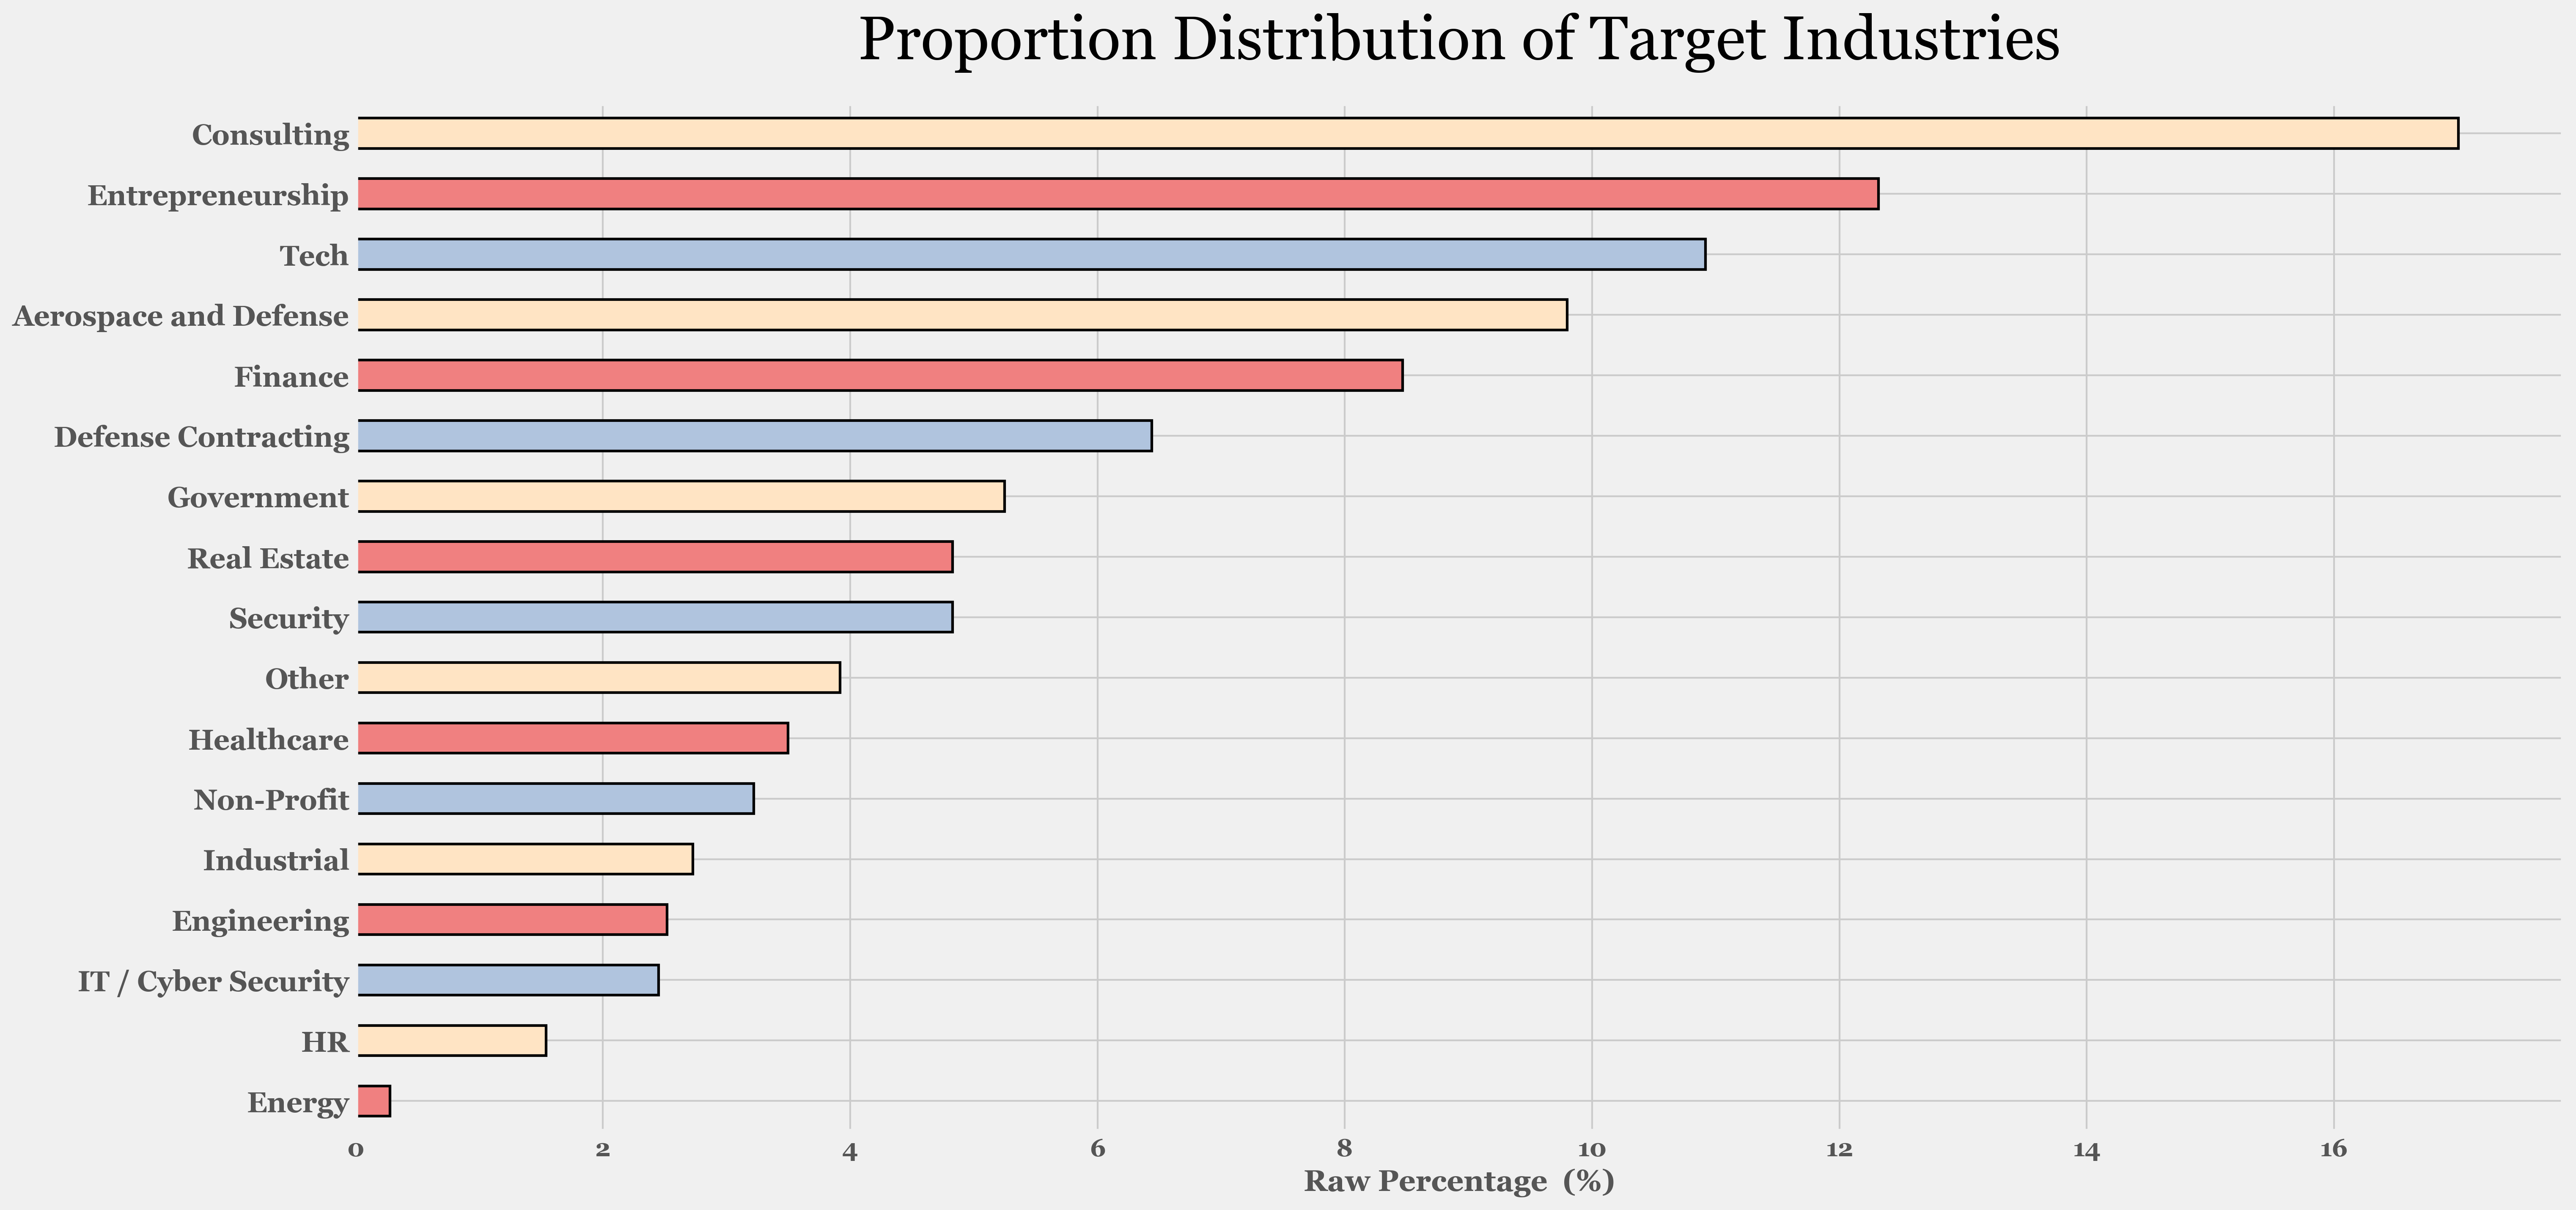

In [144]:
fig = plt.figure(figsize=(20,10), dpi=300)
industries = time['Target_Industries_Pls_pick_up_to_Three'].str.split(';').dropna()\
                .explode().value_counts()/1429 * 100
ind_plot = industries.sort_values().plot.barh(color=['lightcoral', 'bisque', 'lightsteelblue'],edgecolor='black', lw=1.5)
yticks = plt.yticks(fontweight='bold', fontsize=16)
xlael = plt.xlabel('Raw Percentage  (%)', fontweight='bold')
xticks = plt.xticks(fontweight='bold')
title = plt.title('Proportion Distribution of Target Industries', pad=25, fontsize=35)

# Education Levels

In [437]:
degrees = {'Undergrad':541, 'Undergrad\nNational\nPercentage':270, 'Undergrad:\nIn Progress':97, 'Graduate\nDegree': 222, 'Grad Degree\nNational\nPercentage':98, 'Grad Degree:\nIn Progress':128, 'MBA':118, 'MBA\nNational\nPercentage': 60, 'Masters\nDegree:\nNon-MBA':222-118, 'None':55}

In [438]:
degrees = pd.DataFrame(degrees, index=degrees.keys()).iloc[0,:]

In [439]:
degrees

Undergrad                            541
Undergrad\nNational\nPercentage      270
Undergrad:\nIn Progress               97
Graduate\nDegree                     222
Grad Degree\nNational\nPercentage     98
Grad Degree:\nIn Progress            128
MBA                                  118
MBA\nNational\nPercentage             60
Masters\nDegree:\nNon-MBA            104
None                                  55
Name: Undergrad, dtype: int64

In [440]:
prop_degrees = degrees/752 * 100

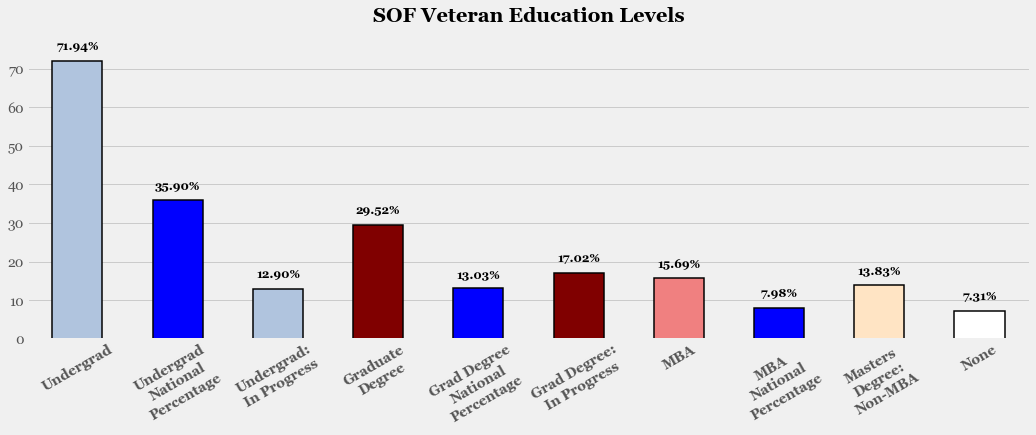

In [441]:
fig = plt.figure(figsize=(16,5))
_ = prop_degrees.plot.bar(color=['lightsteelblue', 'blue', 'lightsteelblue', 'maroon', 'blue', 'maroon', 'lightcoral', 'blue', 'bisque', 'white'], edgecolor='black', lw=1.5)
ticks = plt.xticks(fontweight='bold', rotation=30)
rects = _.patches
# Make some labels.
labels = [f"{value:.2f}%" for value in prop_degrees.values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    txt = plt.text(rect.get_x() + rect.get_width() / 2, height + 2, label,
            ha='center', va='bottom', fontweight='bold', fontsize=12)
grid = plt.grid(False)
axes = plt.gca()
axes.yaxis.grid()

title = plt.title('SOF Veteran Education Levels', fontweight='bold', fontsize=20, pad=25)

In [500]:
sof_degrees = {'Undergrad':541, 'Undergrad:\nIn Progress':97, 'Graduate\nDegree': 222, 'Grad Degree:\nIn Progress':128, 'MBA':118, 'Masters Degree:\nNon-MBA':222-118, 'None':55}
sof_degrees = pd.DataFrame(sof_degrees, index=sof_degrees.keys()).iloc[0,:]
sof_degrees = sof_degrees/752 * 100
national = {'Undergrad':270, 'Undergrad:\nIn Progress':0, 'Graduate\nDegree': 98, 'Grad Degree:\nIn Progress':0, 'MBA':60, 'Masters\nDegree:\nNon-MBA':0, 'None':0}
national = pd.DataFrame(national, index=national.keys()).iloc[0,:]
national = national/752 * 100

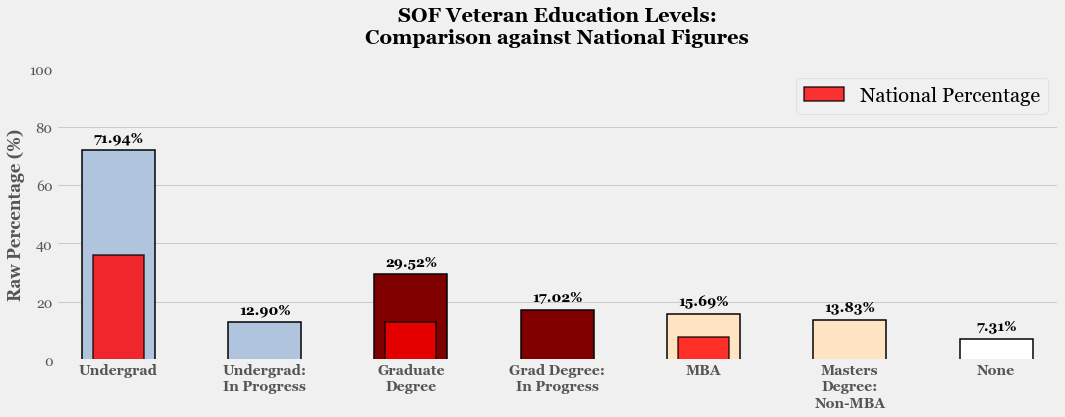

In [509]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)
_ = sof_degrees.plot.bar(width=0.5, lw=1.5, label='_nolegend_', edgecolor='black', color=['lightsteelblue', 'lightsteelblue', 'maroon', 'maroon', 'bisque', 'bisque', 'white'])
rects = _.patches
# Make some labels.
labels = [f"{value:.2f}%" for value in sof_degrees.values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    txt = plt.text(rect.get_x() + rect.get_width() / 2, height + 2, label,
            ha='center', va='bottom', fontweight='bold', fontsize=14)

plt2 = national.plot.bar(width=0.35, lw=1.5,label='National Percentage', color='red', alpha=0.8, edgecolor='black')
leg = plt.legend(fontsize='x-large')
ticks = plt.xticks(fontweight='bold', rotation=0)
ylabel = plt.ylabel('Raw Percentage (%)', fontweight='bold')
ylim = plt.ylim(0,100)
grid = plt.grid(False)
axes = plt.gca()
axes.yaxis.grid()
title = plt.title('SOF Veteran Education Levels:\nComparison against National Figures', fontweight='bold', fontsize=20, pad=25)

In [407]:
frame = time.loc[:,['Grad_Degree', 'Grad_Degree_Type', 'Graduate_School']]

# Calculating % of Undergrads by Branch

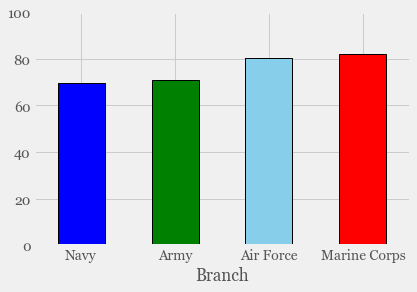

In [553]:
undergrads = time[time['Undergrad'] == 'Complete']
branch_counts = time['Branch'].value_counts()[:-1]
ugroup = undergrads.groupby('Branch')['Undergrad'].count().sort_values(ascending=False)
percents = ugroup/branch_counts * 100
plot = percents.plot.bar(percents.index, percents.values, color=['blue', 'green','skyblue', 'red'], edgecolor='black', lw=1)
ticks = plt.xticks(rotation=0)
ylim = plt.ylim(0,100)

In [550]:
grads = time[time['Grad_Degree'] == 'Complete']
print(len(grads))
branch_counts = time['Branch'].value_counts()[:-1]
ggroup = grads.groupby('Branch')['Grad_Degree'].count().sort_values(ascending=False)[:-1]
gpercents = ggroup/branch_counts * 100
gpercents
#percents.plot.bar(percents.index, percents.values, color=['blue', 'green','skyblue', 'red'])

222


Branch
Navy            26.479751
Army            28.052805
Air Force       43.939394
Marine Corps    36.065574
dtype: float64

# Number of Interviews

In [264]:
infos = time['of_informational_interviews_completed'].dropna()
infos = pd.Series(np.where(infos== 'More than 10', 12, infos)).astype(int)
info_vals = infos.value_counts().sort_index()

In [ ]:
formals = time['of_job_formal_interviews_completed'].dropna()
formals = pd.Series(np.where(formals== 'More than 10', 12, formals)).astype(int)
formal_vals = formals.value_counts().sort_index()

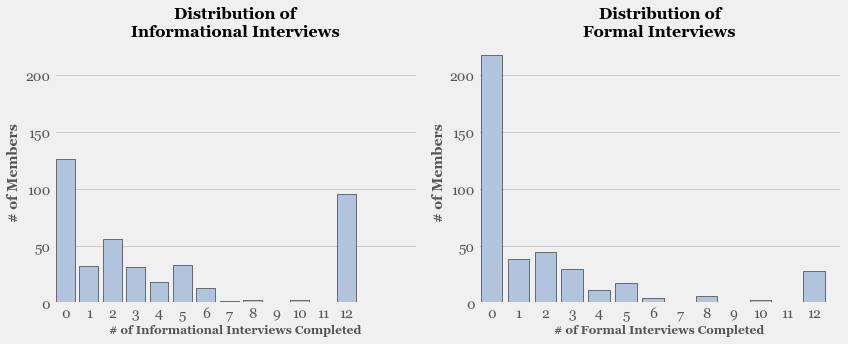

In [559]:
fig = plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
plot1 = plt.bar(info_vals.index, info_vals.values, align='center', edgecolor='black', color='lightsteelblue')
limit = plt.xlim(-0.5, 15)
ticks = plt.xticks(range(0,13))
grid = plt.grid(False)
axes = plt.gca()
axes.yaxis.grid()
title = plt.title('Distribution of\nInformational Interviews', fontweight='bold', fontsize=16)
ylabel = plt.ylabel('# of Members', fontweight='bold', fontsize=14)
xlabel = plt.xlabel('# of Informational Interviews Completed', fontweight='bold', fontsize=12)

_ = plt.subplot(1,2,2, sharey=ax1)
plot2 = plt.bar(formal_vals.index, formal_vals.values, align='center', edgecolor='black', color='lightsteelblue')
limit = plt.xlim(-0.5, 13)
ticks = plt.xticks(range(0,13))
grid = plt.grid(False)
axes = plt.gca()
axes.yaxis.grid()
title = plt.title('Distribution of\nFormal Interviews', fontweight='bold', fontsize=16)
ylabel = plt.ylabel('# of Members', fontweight='bold', fontsize=14)
xlabel = plt.xlabel('# of Formal Interviews Completed', fontweight='bold', fontsize=12)
fig.tight_layout()

# Mobility statistics

In [298]:
mobility = time['How_mobile_are_you_and_your_family'].dropna()
def ufunc(row):
    if row == 'I can move tomorrow':
        return 6
    elif row == 'Never moving again':
        return 0
    else: return row
mobility = mobility.apply(ufunc).astype(int)

In [368]:
mobile_vals = mobility.value_counts().sort_index()

<BarContainer object of 7 artists>

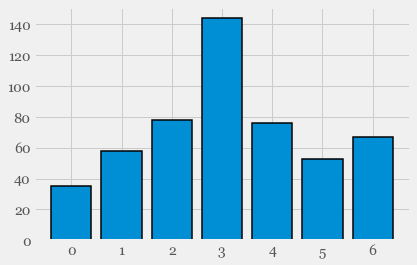

In [371]:
plt.bar(mobile_vals.index, mobile_vals.values, edgecolor='black', lw=1.5)

In [381]:
inds = time['Target_Industries_Pls_pick_up_to_Three'].str.contains('Tech').dropna()\
[time['Target_Industries_Pls_pick_up_to_Three'].str.contains('Tech').dropna()].index

In [387]:
time.to_csv('../data/cleaned_data.csv', index=False)